<h1><center>MÉTODO DE SOLUCIÓN II</center></h1>

RESUMEN:<br>
&ensp;1.Suposiciones sobre la demanda<br>
&ensp;2.Solución primera semana<br>
&ensp;3.Solución segunda semana<br>
&ensp;4.Solución tercera semana<br>
&ensp;5.Solución cuarta semana<br>


En este Script se expone el método de solución para el modelo de VRP  con flota heterogenea de camiones. En este caso se utilizado utilizado el paquete VRPy para ejecutar la resolución del problema.

https://vrpy.readthedocs.io/en/dev/index.html#

## 1. Suposiciones sobre la demanda

Asumimos el mismo escenario que en el script "Método de Solución I".

In [1]:
import numpy as np
Demanda_Total_Anual= 2531
mes=12

In [2]:
#Asumimos que la demanda anual se distribuye linealmente para cada mes del año.
Demanda_month=round(Demanda_Total_Anual/mes)
Demanda_month

211

In [3]:
#Genero el conjunto de nodos a los cuales debemos ofrecer servicios
n=10
puntos_verdes=[x for x in range(1,n+1)]
puntos_verdes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
#Asumimos que la demanda mensual se distrybuye aleatoriamente entre las 4 semanas de cada mes.
rnd = np.random
rnd.seed(0)
Demanda_weeks=np.random.multinomial(Demanda_month, np.ones(4)/4, size=1)[0].tolist()
Demanda_weeks

[56, 53, 62, 40]

In [5]:
#Creo una función para asignar una demanda aleatoria  en cada punto verde.
rnd = np.random
rnd.seed(0)
def get_nodos_demand(semana):
    n=10
    key=puntos_verdes
    values=np.random.multinomial(semana, np.ones(n)/n, size=1)[0].tolist()
    r=dict(zip(key,values))
    return r

In [6]:
# Semana 1
week1=get_nodos_demand(Demanda_weeks[0])
week1, sum(week1.values())

({1: 6, 2: 7, 3: 6, 4: 5, 5: 5, 6: 6, 7: 5, 8: 8, 9: 6, 10: 2}, 56)

In [7]:
# Semana 2
week2=get_nodos_demand(Demanda_weeks[1])
week2, sum(week2.values())

({1: 5, 2: 7, 3: 5, 4: 5, 5: 8, 6: 2, 7: 3, 8: 2, 9: 10, 10: 6}, 53)

In [8]:
# Semana 3
week3=get_nodos_demand(Demanda_weeks[2])
week3, sum(week3.values())

({1: 8, 2: 9, 3: 10, 4: 7, 5: 4, 6: 6, 7: 2, 8: 6, 9: 3, 10: 7}, 62)

In [9]:
# Semana 4
week4=get_nodos_demand(Demanda_weeks[3])
week4, sum(week4.values())

({1: 7, 2: 4, 3: 3, 4: 3, 5: 5, 6: 3, 7: 4, 8: 1, 9: 5, 10: 5}, 40)

In [10]:
week_demand_puntoverde={1:week1,2:week2,3:week3,4:week4}
week_demand_puntoverde

{1: {1: 6, 2: 7, 3: 6, 4: 5, 5: 5, 6: 6, 7: 5, 8: 8, 9: 6, 10: 2},
 2: {1: 5, 2: 7, 3: 5, 4: 5, 5: 8, 6: 2, 7: 3, 8: 2, 9: 10, 10: 6},
 3: {1: 8, 2: 9, 3: 10, 4: 7, 5: 4, 6: 6, 7: 2, 8: 6, 9: 3, 10: 7},
 4: {1: 7, 2: 4, 3: 3, 4: 3, 5: 5, 6: 3, 7: 4, 8: 1, 9: 5, 10: 5}}

In [11]:
#Genero el conjunto Vertices = Puntos verdes + Deposito común
vertices=[0]+puntos_verdes
vertices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [12]:
#Creo unas coordenadas aleatorias para todos los vertices
rnd = np.random
rnd.seed(0)
loc_x=rnd.rand(len(vertices))*100
loc_y=rnd.rand(len(vertices))*100

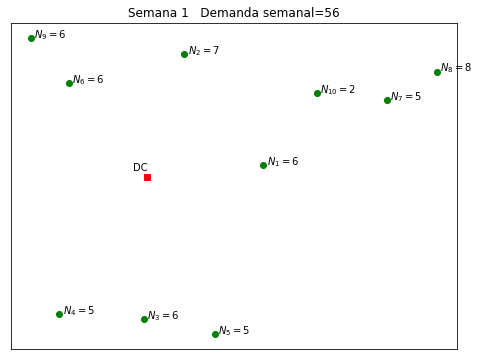

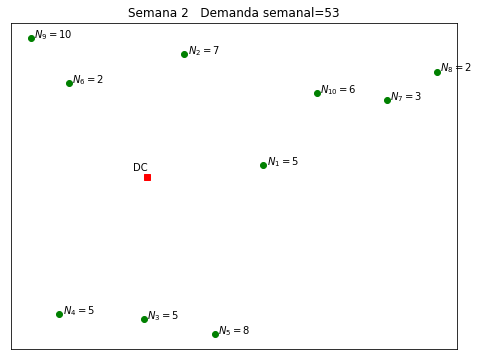

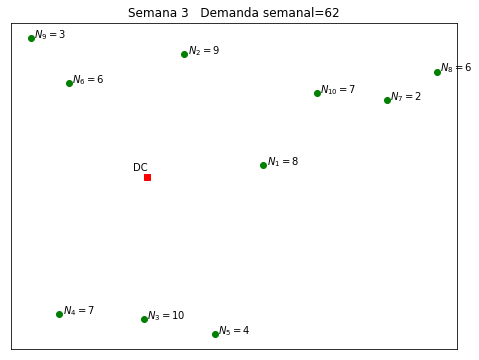

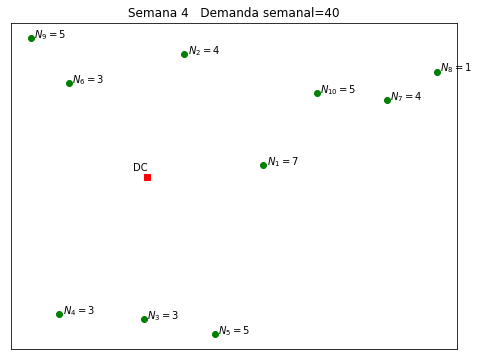

In [13]:
import matplotlib.pyplot as plt

for t,w in week_demand_puntoverde.items():
    plt.figure(figsize=(8,6))
    plt.scatter(loc_x[1:],loc_y[1:],color="green")
    plt.xticks([])
    plt.yticks([])
    plt.title("Semana %d   Demanda semanal=%d" %(t,sum(w.values())))
    for i in puntos_verdes:
        plt.annotate('$N_{%d}=%d$' % (i,w[i]),(loc_x[i]+0.5,loc_y[i]))
    #Expongo el deposito comun
    plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
    plt.annotate('DC',(loc_x[0]-2,loc_y[0]+2))

## 2. Solución primera semana

In [14]:
week1

{1: 6, 2: 7, 3: 6, 4: 5, 5: 5, 6: 6, 7: 5, 8: 8, 9: 6, 10: 2}

In [1]:
# Definición de la red

from networkx import DiGraph

G = DiGraph()

G.add_edge("Source", 1, cost=[17,21])
G.add_edge("Source", 2, cost=[40,48])   
G.add_edge("Source", 3, cost=[46,55])
G.add_edge("Source", 4, cost=[46,55])
G.add_edge("Source", 5, cost=[52,62])
G.add_edge("Source", 6, cost=[32,39])
G.add_edge("Source", 7, cost=[42,51])
G.add_edge("Source", 8, cost=[54,64])
G.add_edge("Source", 9, cost=[48,57])
G.add_edge("Source", 10, cost=[36,44]) 


G.add_edge(1, "Sink", cost=[17,21])
G.add_edge(2, "Sink", cost=[40,48])
G.add_edge(3, "Sink", cost=[46,55])
G.add_edge(4, "Sink", cost=[46,55])
G.add_edge(5, "Sink", cost=[52,62])
G.add_edge(6, "Sink", cost=[32,39])
G.add_edge(7, "Sink", cost=[42,51])
G.add_edge(8, "Sink", cost=[54,64])
G.add_edge(9, "Sink", cost=[48,57])
G.add_edge(10, "Sink", cost=[36,44])



G.add_edge(1, 2, cost=[37,45])
G.add_edge(1, 3, cost=[53,63])
G.add_edge(1, 4, cost=[56,67])
G.add_edge(1, 5, cost=[55,66])
G.add_edge(1, 6, cost=[38,46])
G.add_edge(1, 7, cost=[27,33])
G.add_edge(1, 8, cost=[39,47])
G.add_edge(1, 9, cost=[53,63])
G.add_edge(1, 10, cost=[24,29])


G.add_edge(2, 1, cost=[37,45])
G.add_edge(2, 3, cost=[86,103])
G.add_edge(2, 4, cost=[86,103])
G.add_edge(2, 5, cost=[91,109])
G.add_edge(2, 6, cost=[19,23])
G.add_edge(2, 7, cost=[32,39])
G.add_edge(2, 8, cost=[37,44])
G.add_edge(2, 9, cost=[23,27])
G.add_edge(2, 10, cost=[23,27])


G.add_edge(3, 1, cost=[53,63])
G.add_edge(3, 2, cost=[86,103])
G.add_edge(3, 4, cost=[12,15])
G.add_edge(3, 5, cost=[11,14])
G.add_edge(3, 6, cost=[77,92])
G.add_edge(3, 7, cost=[79,95])
G.add_edge(3, 8, cost=[90,108])
G.add_edge(3, 9, cost=[92,111])
G.add_edge(3, 10, cost=[77,92])



G.add_edge(4, 1, cost=[56,67])
G.add_edge(4, 2, cost=[86,103])
G.add_edge(4, 3, cost=[12,15])
G.add_edge(4, 5, cost=[23,28])
G.add_edge(4, 6, cost=[75,89])
G.add_edge(4, 7, cost=[83,100])
G.add_edge(4, 8, cost=[95,114])
G.add_edge(4, 9, cost=[89,107])
G.add_edge(4, 10, cost=[80,96])

G.add_edge(5, 1, cost=[55,66])
G.add_edge(5, 2, cost=[91,109])
G.add_edge(5, 3, cost=[11,14])
G.add_edge(5, 4, cost=[23,28])
G.add_edge(5, 6, cost=[84,101])
G.add_edge(5, 7, cost=[80,96])
G.add_edge(5, 8, cost=[91,109]) 
G.add_edge(5, 9, cost=[99,119])
G.add_edge(5, 10, cost=[79,95])

G.add_edge(6, 1, cost=[38,46])
G.add_edge(6, 2, cost=[19,23])
G.add_edge(6, 3, cost=[77,92])
G.add_edge(6, 4, cost=[75,89])
G.add_edge(6, 5, cost=[84,101])
G.add_edge(6, 7, cost=[46,55])
G.add_edge(6, 8, cost=[53,63])
G.add_edge(6, 9, cost=[16,19])
G.add_edge(6, 10, cost=[36,43])

G.add_edge(7, 1, cost=[27,33])
G.add_edge(7, 2, cost=[32,39])
G.add_edge(7, 3, cost=[79,95])
G.add_edge(7, 4, cost=[83,100])
G.add_edge(7, 5, cost=[80,96])
G.add_edge(7, 6, cost=[46,55])
G.add_edge(7, 8, cost=[12,14])
G.add_edge(7, 9, cost=[55,66])
G.add_edge(7, 10, cost=[10,12])


G.add_edge(8, 1, cost=[39,47])
G.add_edge(8, 2, cost=[37,44])
G.add_edge(8, 3, cost=[90,108])
G.add_edge(8, 4, cost=[95,114])
G.add_edge(8, 5, cost=[91,109])
G.add_edge(8, 6, cost=[53,63])
G.add_edge(8, 7, cost=[12,14])
G.add_edge(8, 9, cost=[59,71])
G.add_edge(8, 10, cost=[19,22])

G.add_edge(9, 1, cost=[53,63])
G.add_edge(9, 2, cost=[23,27])
G.add_edge(9, 3, cost=[92,111])
G.add_edge(9, 4, cost=[89,107])
G.add_edge(9, 5, cost=[99,119])
G.add_edge(9, 6, cost=[16,19])
G.add_edge(9, 7, cost=[55,66])
G.add_edge(9, 8, cost=[59,71])
G.add_edge(9, 10, cost=[45,54])

G.add_edge(10, 1, cost=[24,29])
G.add_edge(10, 2, cost=[23,27])
G.add_edge(10, 3, cost=[77,92])
G.add_edge(10, 4, cost=[80,96])
G.add_edge(10, 5, cost=[79,95])
G.add_edge(10, 6, cost=[36,43])
G.add_edge(10, 7, cost=[10,12])
G.add_edge(10, 8, cost=[19,22]) 
G.add_edge(10, 9, cost=[45,54])


G.nodes[1]["demand"] = 6
G.nodes[2]["demand"] = 7
G.nodes[3]["demand"] = 6
G.nodes[4]["demand"] = 5
G.nodes[5]["demand"] = 5
G.nodes[6]["demand"] = 6
G.nodes[7]["demand"] = 5
G.nodes[8]["demand"] = 8
G.nodes[9]["demand"] = 6
G.nodes[10]["demand"] = 2



 


In [2]:
from vrpy import VehicleRoutingProblem
prob = VehicleRoutingProblem(G, mixed_fleet=True,fixed_cost=[300,500],load_capacity=[10,15])
%time prob.solve()

INFO:vrpy.vrp:new upper bound : max num stops = 5
INFO:vrpy.vrp:iteration 0, 3826.0
INFO:vrpy.vrp:iteration 1, 3451.0
INFO:vrpy.vrp:iteration 2, 3080.0
INFO:vrpy.vrp:iteration 3, 3080.0
INFO:vrpy.vrp:iteration 4, 3080.0
INFO:vrpy.vrp:iteration 5, 2958.0
INFO:vrpy.vrp:iteration 6, 2958.0
INFO:vrpy.vrp:iteration 7, 2813.0
INFO:vrpy.vrp:iteration 8, 2813.0
INFO:vrpy.vrp:iteration 9, 2746.5
INFO:vrpy.vrp:iteration 10, 2746.5
INFO:vrpy.vrp:iteration 11, 2659.5
INFO:vrpy.vrp:iteration 12, 2659.5
INFO:vrpy.vrp:iteration 13, 2659.5
INFO:vrpy.vrp:iteration 14, 2659.5
INFO:vrpy.vrp:iteration 15, 2619.5
INFO:vrpy.vrp:iteration 16, 2619.5
INFO:vrpy.vrp:iteration 17, 2618.3
INFO:vrpy.vrp:iteration 18, 2617.7
INFO:vrpy.master_solve_pulp:total cost = 2686.0


Wall time: 6.16 s


In [17]:
# Coste total de la operación
prob.best_value

2686

In [18]:
#Coste de cada ruta
prob.best_routes_cost

{1: 380, 2: 421, 3: 615, 4: 639, 5: 631}

In [19]:
# Material recogido en cada ruta
prob.best_routes_load

{1: 7, 2: 10, 3: 12, 4: 12, 5: 15}

In [20]:
prob.best_routes_type

{1: 0, 2: 0, 3: 1, 4: 1, 5: 1}

In [21]:
#Rutas optimas
prob.best_routes

{1: ['Source', 2, 'Sink'],
 2: ['Source', 5, 4, 'Sink'],
 3: ['Source', 9, 6, 'Sink'],
 4: ['Source', 3, 1, 'Sink'],
 5: ['Source', 10, 8, 7, 'Sink']}

In [22]:
arcos_activos1=[(0,2),(2,0),(0,5),(5,4),(4,0),(0,6),(6,9),(9,6),(0,10),(10,8),(8,7),(7,0),(0,3),(3,1),(1,0)]

<function matplotlib.pyplot.show(close=None, block=None)>

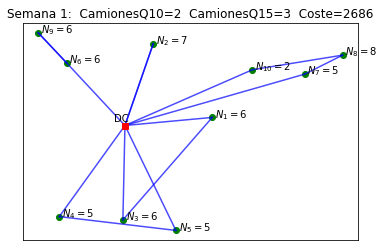

In [23]:
#Representación de la solución
plt.figure(figsize=(6,4))
plt.scatter(loc_x[1:],loc_y[1:],color="green")
plt.xticks([])
plt.yticks([])
plt.title("Semana 1:  CamionesQ10=2  CamionesQ15=3  Coste=%d" %(prob.best_value))
for i in puntos_verdes:
    plt.annotate('$N_{%d}=%d$' % (i,week1[i]),(loc_x[i]+0.5,loc_y[i]))
for i,j in arcos_activos1:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],color="blue",alpha=0.7)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.annotate('DC',(loc_x[0]-2,loc_y[0]+2))
plt.show

## 3. Solución segunda semana

In [24]:
week2

{1: 5, 2: 7, 3: 5, 4: 5, 5: 8, 6: 2, 7: 3, 8: 2, 9: 10, 10: 6}

In [25]:
# Definición de la red

from networkx import DiGraph

G2 = DiGraph()

G2.add_edge("Source", 1, cost=[17,21])
G2.add_edge("Source", 2, cost=[40,48])   
G2.add_edge("Source", 3, cost=[46,55])
G2.add_edge("Source", 4, cost=[46,55])
G2.add_edge("Source", 5, cost=[52,62])
G2.add_edge("Source", 6, cost=[32,39])
G2.add_edge("Source", 7, cost=[42,51])
G2.add_edge("Source", 8, cost=[54,64])
G2.add_edge("Source", 9, cost=[48,57])
G2.add_edge("Source", 10, cost=[36,44]) 


G2.add_edge(1, "Sink", cost=[17,21])
G2.add_edge(2, "Sink", cost=[40,48])
G2.add_edge(3, "Sink", cost=[46,55])
G2.add_edge(4, "Sink", cost=[46,55])
G2.add_edge(5, "Sink", cost=[52,62])
G2.add_edge(6, "Sink", cost=[32,39])
G2.add_edge(7, "Sink", cost=[42,51])
G2.add_edge(8, "Sink", cost=[54,64])
G2.add_edge(9, "Sink", cost=[48,57])
G2.add_edge(10, "Sink", cost=[36,44])



G2.add_edge(1, 2, cost=[37,45])
G2.add_edge(1, 3, cost=[53,63])
G2.add_edge(1, 4, cost=[56,67])
G2.add_edge(1, 5, cost=[55,66])
G2.add_edge(1, 6, cost=[38,46])
G2.add_edge(1, 7, cost=[27,33])
G2.add_edge(1, 8, cost=[39,47])
G2.add_edge(1, 9, cost=[53,63])
G2.add_edge(1, 10, cost=[24,29])


G2.add_edge(2, 1, cost=[37,45])
G2.add_edge(2, 3, cost=[86,103])
G2.add_edge(2, 4, cost=[86,103])
G2.add_edge(2, 5, cost=[91,109])
G2.add_edge(2, 6, cost=[19,23])
G2.add_edge(2, 7, cost=[32,39])
G2.add_edge(2, 8, cost=[37,44])
G2.add_edge(2, 9, cost=[23,27])
G2.add_edge(2, 10, cost=[23,27])


G2.add_edge(3, 1, cost=[53,63])
G2.add_edge(3, 2, cost=[86,103])
G2.add_edge(3, 4, cost=[12,15])
G2.add_edge(3, 5, cost=[11,14])
G2.add_edge(3, 6, cost=[77,92])
G2.add_edge(3, 7, cost=[79,95])
G2.add_edge(3, 8, cost=[90,108])
G2.add_edge(3, 9, cost=[92,111])
G2.add_edge(3, 10, cost=[77,92])



G2.add_edge(4, 1, cost=[56,67])
G2.add_edge(4, 2, cost=[86,103])
G2.add_edge(4, 3, cost=[12,15])
G2.add_edge(4, 5, cost=[23,28])
G2.add_edge(4, 6, cost=[75,89])
G2.add_edge(4, 7, cost=[83,100])
G2.add_edge(4, 8, cost=[95,114])
G2.add_edge(4, 9, cost=[89,107])
G2.add_edge(4, 10, cost=[80,96])

G2.add_edge(5, 1, cost=[55,66])
G2.add_edge(5, 2, cost=[91,109])
G2.add_edge(5, 3, cost=[11,14])
G2.add_edge(5, 4, cost=[23,28])
G2.add_edge(5, 6, cost=[84,101])
G2.add_edge(5, 7, cost=[80,96])
G2.add_edge(5, 8, cost=[91,109]) 
G2.add_edge(5, 9, cost=[99,119])
G2.add_edge(5, 10, cost=[79,95])

G2.add_edge(6, 1, cost=[38,46])
G2.add_edge(6, 2, cost=[19,23])
G2.add_edge(6, 3, cost=[77,92])
G2.add_edge(6, 4, cost=[75,89])
G2.add_edge(6, 5, cost=[84,101])
G2.add_edge(6, 7, cost=[46,55])
G2.add_edge(6, 8, cost=[53,63])
G2.add_edge(6, 9, cost=[16,19])
G2.add_edge(6, 10, cost=[36,43])

G2.add_edge(7, 1, cost=[27,33])
G2.add_edge(7, 2, cost=[32,39])
G2.add_edge(7, 3, cost=[79,95])
G2.add_edge(7, 4, cost=[83,100])
G2.add_edge(7, 5, cost=[80,96])
G2.add_edge(7, 6, cost=[46,55])
G2.add_edge(7, 8, cost=[12,14])
G2.add_edge(7, 9, cost=[55,66])
G2.add_edge(7, 10, cost=[10,12])


G2.add_edge(8, 1, cost=[39,47])
G2.add_edge(8, 2, cost=[37,44])
G2.add_edge(8, 3, cost=[90,108])
G2.add_edge(8, 4, cost=[95,114])
G2.add_edge(8, 5, cost=[91,109])
G2.add_edge(8, 6, cost=[53,63])
G2.add_edge(8, 7, cost=[12,14])
G2.add_edge(8, 9, cost=[59,71])
G2.add_edge(8, 10, cost=[19,22])

G2.add_edge(9, 1, cost=[53,63])
G2.add_edge(9, 2, cost=[23,27])
G2.add_edge(9, 3, cost=[92,111])
G2.add_edge(9, 4, cost=[89,107])
G2.add_edge(9, 5, cost=[99,119])
G2.add_edge(9, 6, cost=[16,19])
G2.add_edge(9, 7, cost=[55,66])
G2.add_edge(9, 8, cost=[59,71])
G2.add_edge(9, 10, cost=[45,54])

G2.add_edge(10, 1, cost=[24,29])
G2.add_edge(10, 2, cost=[23,27])
G2.add_edge(10, 3, cost=[77,92])
G2.add_edge(10, 4, cost=[80,96])
G2.add_edge(10, 5, cost=[79,95])
G2.add_edge(10, 6, cost=[36,43])
G2.add_edge(10, 7, cost=[10,12])
G2.add_edge(10, 8, cost=[19,22]) 
G2.add_edge(10, 9, cost=[45,54])


G2.nodes[1]["demand"] = 5
G2.nodes[2]["demand"] = 7
G2.nodes[3]["demand"] = 5
G2.nodes[4]["demand"] = 5
G2.nodes[5]["demand"] = 8
G2.nodes[6]["demand"] = 2
G2.nodes[7]["demand"] = 3
G2.nodes[8]["demand"] = 2
G2.nodes[9]["demand"] = 10
G2.nodes[10]["demand"] = 6

In [26]:
from vrpy import VehicleRoutingProblem
prob2 = VehicleRoutingProblem(G2, mixed_fleet=True,fixed_cost=[300,500],load_capacity=[10,15])
%time prob2.solve()

INFO:vrpy.vrp:new upper bound : max num stops = 6
INFO:vrpy.vrp:iteration 0, 3826.0
INFO:vrpy.vrp:iteration 1, 3109.0
INFO:vrpy.vrp:iteration 2, 2729.0
INFO:vrpy.vrp:iteration 3, 2729.0
INFO:vrpy.vrp:iteration 4, 2718.0
INFO:vrpy.vrp:iteration 5, 2541.5
INFO:vrpy.vrp:iteration 6, 2365.5
INFO:vrpy.vrp:iteration 7, 2365.5
INFO:vrpy.vrp:iteration 8, 2365.5
INFO:vrpy.vrp:iteration 9, 2306.2
INFO:vrpy.vrp:iteration 10, 2293.9
INFO:vrpy.vrp:iteration 11, 2273.5
INFO:vrpy.vrp:iteration 12, 2273.5
INFO:vrpy.vrp:iteration 13, 2273.5
INFO:vrpy.vrp:iteration 14, 2254.3
INFO:vrpy.vrp:iteration 15, 2247.0
INFO:vrpy.master_solve_pulp:total cost = 2247.0


Wall time: 5.96 s


In [27]:
#Rutas optimas
prob2.best_routes

{1: ['Source', 5, 'Sink'],
 2: ['Source', 9, 'Sink'],
 3: ['Source', 4, 3, 'Sink'],
 4: ['Source', 8, 7, 1, 'Sink'],
 5: ['Source', 6, 2, 10, 'Sink']}

In [28]:
#Coste de cada ruta
prob2.best_routes_cost

{1: 404, 2: 396, 3: 404, 4: 410, 5: 633}

In [29]:
# Material recogido en cada ruta
prob2.best_routes_load

{1: 8, 2: 10, 3: 10, 4: 10, 5: 15}

In [30]:
arcos_activos2=[(0,5),(5,0),(0,9),(9,0),(0,4),(4,3),(3,0),(0,8),(8,7),(7,1),(1,0),(0,10),(10,2),(2,6),(6,0)]

<function matplotlib.pyplot.show(close=None, block=None)>

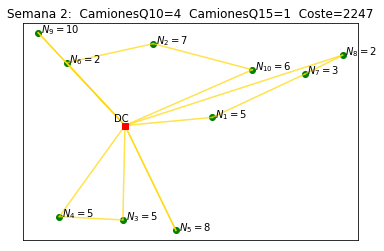

In [31]:
#Representación de la solución
plt.figure(figsize=(6,4))
plt.scatter(loc_x[1:],loc_y[1:],color="green")
plt.xticks([])
plt.yticks([])
plt.title("Semana 2:  CamionesQ10=4  CamionesQ15=1  Coste=%d" %(prob2.best_value))
for i in puntos_verdes:
    plt.annotate('$N_{%d}=%d$' % (i,week2[i]),(loc_x[i]+0.5,loc_y[i]))
for i,j in arcos_activos2:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],color="gold",alpha=0.7)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.annotate('DC',(loc_x[0]-2,loc_y[0]+2))
plt.show

## 4. Solución tercera semana

In [32]:
# Definición de la red

from networkx import DiGraph

G3 = DiGraph()

G3.add_edge("Source", 1, cost=[17,21])
G3.add_edge("Source", 2, cost=[40,48])   
G3.add_edge("Source", 3, cost=[46,55])
G3.add_edge("Source", 4, cost=[46,55])
G3.add_edge("Source", 5, cost=[52,62])
G3.add_edge("Source", 6, cost=[32,39])
G3.add_edge("Source", 7, cost=[42,51])
G3.add_edge("Source", 8, cost=[54,64])
G3.add_edge("Source", 9, cost=[48,57])
G3.add_edge("Source", 10, cost=[36,44]) 


G3.add_edge(1, "Sink", cost=[17,21])
G3.add_edge(2, "Sink", cost=[40,48])
G3.add_edge(3, "Sink", cost=[46,55])
G3.add_edge(4, "Sink", cost=[46,55])
G3.add_edge(5, "Sink", cost=[52,62])
G3.add_edge(6, "Sink", cost=[32,39])
G3.add_edge(7, "Sink", cost=[42,51])
G3.add_edge(8, "Sink", cost=[54,64])
G3.add_edge(9, "Sink", cost=[48,57])
G3.add_edge(10, "Sink", cost=[36,44])



G3.add_edge(1, 2, cost=[37,45])
G3.add_edge(1, 3, cost=[53,63])
G3.add_edge(1, 4, cost=[56,67])
G3.add_edge(1, 5, cost=[55,66])
G3.add_edge(1, 6, cost=[38,46])
G3.add_edge(1, 7, cost=[27,33])
G3.add_edge(1, 8, cost=[39,47])
G3.add_edge(1, 9, cost=[53,63])
G3.add_edge(1, 10, cost=[24,29])


G3.add_edge(2, 1, cost=[37,45])
G3.add_edge(2, 3, cost=[86,103])
G3.add_edge(2, 4, cost=[86,103])
G3.add_edge(2, 5, cost=[91,109])
G3.add_edge(2, 6, cost=[19,23])
G3.add_edge(2, 7, cost=[32,39])
G3.add_edge(2, 8, cost=[37,44])
G3.add_edge(2, 9, cost=[23,27])
G3.add_edge(2, 10, cost=[23,27])


G3.add_edge(3, 1, cost=[53,63])
G3.add_edge(3, 2, cost=[86,103])
G3.add_edge(3, 4, cost=[12,15])
G3.add_edge(3, 5, cost=[11,14])
G3.add_edge(3, 6, cost=[77,92])
G3.add_edge(3, 7, cost=[79,95])
G3.add_edge(3, 8, cost=[90,108])
G3.add_edge(3, 9, cost=[92,111])
G3.add_edge(3, 10, cost=[77,92])



G3.add_edge(4, 1, cost=[56,67])
G3.add_edge(4, 2, cost=[86,103])
G3.add_edge(4, 3, cost=[12,15])
G3.add_edge(4, 5, cost=[23,28])
G3.add_edge(4, 6, cost=[75,89])
G3.add_edge(4, 7, cost=[83,100])
G3.add_edge(4, 8, cost=[95,114])
G3.add_edge(4, 9, cost=[89,107])
G3.add_edge(4, 10, cost=[80,96])

G3.add_edge(5, 1, cost=[55,66])
G3.add_edge(5, 2, cost=[91,109])
G3.add_edge(5, 3, cost=[11,14])
G3.add_edge(5, 4, cost=[23,28])
G3.add_edge(5, 6, cost=[84,101])
G3.add_edge(5, 7, cost=[80,96])
G3.add_edge(5, 8, cost=[91,109]) 
G3.add_edge(5, 9, cost=[99,119])
G3.add_edge(5, 10, cost=[79,95])

G3.add_edge(6, 1, cost=[38,46])
G3.add_edge(6, 2, cost=[19,23])
G3.add_edge(6, 3, cost=[77,92])
G3.add_edge(6, 4, cost=[75,89])
G3.add_edge(6, 5, cost=[84,101])
G3.add_edge(6, 7, cost=[46,55])
G3.add_edge(6, 8, cost=[53,63])
G3.add_edge(6, 9, cost=[16,19])
G3.add_edge(6, 10, cost=[36,43])

G3.add_edge(7, 1, cost=[27,33])
G3.add_edge(7, 2, cost=[32,39])
G3.add_edge(7, 3, cost=[79,95])
G3.add_edge(7, 4, cost=[83,100])
G3.add_edge(7, 5, cost=[80,96])
G3.add_edge(7, 6, cost=[46,55])
G3.add_edge(7, 8, cost=[12,14])
G3.add_edge(7, 9, cost=[55,66])
G3.add_edge(7, 10, cost=[10,12])


G3.add_edge(8, 1, cost=[39,47])
G3.add_edge(8, 2, cost=[37,44])
G3.add_edge(8, 3, cost=[90,108])
G3.add_edge(8, 4, cost=[95,114])
G3.add_edge(8, 5, cost=[91,109])
G3.add_edge(8, 6, cost=[53,63])
G3.add_edge(8, 7, cost=[12,14])
G3.add_edge(8, 9, cost=[59,71])
G3.add_edge(8, 10, cost=[19,22])

G3.add_edge(9, 1, cost=[53,63])
G3.add_edge(9, 2, cost=[23,27])
G3.add_edge(9, 3, cost=[92,111])
G3.add_edge(9, 4, cost=[89,107])
G3.add_edge(9, 5, cost=[99,119])
G3.add_edge(9, 6, cost=[16,19])
G3.add_edge(9, 7, cost=[55,66])
G3.add_edge(9, 8, cost=[59,71])
G3.add_edge(9, 10, cost=[45,54])

G3.add_edge(10, 1, cost=[24,29])
G3.add_edge(10, 2, cost=[23,27])
G3.add_edge(10, 3, cost=[77,92])
G3.add_edge(10, 4, cost=[80,96])
G3.add_edge(10, 5, cost=[79,95])
G3.add_edge(10, 6, cost=[36,43])
G3.add_edge(10, 7, cost=[10,12])
G3.add_edge(10, 8, cost=[19,22]) 
G3.add_edge(10, 9, cost=[45,54])


G3.nodes[1]["demand"] = 8
G3.nodes[2]["demand"] = 9
G3.nodes[3]["demand"] = 10
G3.nodes[4]["demand"] = 7
G3.nodes[5]["demand"] = 4
G3.nodes[6]["demand"] = 6
G3.nodes[7]["demand"] = 2
G3.nodes[8]["demand"] = 6
G3.nodes[9]["demand"] = 3
G3.nodes[10]["demand"] = 7

In [33]:
week3

{1: 8, 2: 9, 3: 10, 4: 7, 5: 4, 6: 6, 7: 2, 8: 6, 9: 3, 10: 7}

In [34]:
from vrpy import VehicleRoutingProblem
prob3 = VehicleRoutingProblem(G3, mixed_fleet=True,fixed_cost=[300,500],load_capacity=[10,15])
%time prob3.solve()

INFO:vrpy.vrp:new upper bound : max num stops = 6
INFO:vrpy.vrp:iteration 0, 3826.0
INFO:vrpy.vrp:iteration 1, 3177.0
INFO:vrpy.vrp:iteration 2, 3177.0
INFO:vrpy.vrp:iteration 3, 3078.0
INFO:vrpy.vrp:iteration 4, 2970.0
INFO:vrpy.vrp:iteration 5, 2905.9
INFO:vrpy.vrp:iteration 6, 2779.0
INFO:vrpy.vrp:iteration 7, 2779.0
INFO:vrpy.vrp:iteration 8, 2768.5
INFO:vrpy.vrp:iteration 9, 2688.0
INFO:vrpy.vrp:iteration 10, 2685.5
INFO:vrpy.vrp:iteration 11, 2663.6
INFO:vrpy.vrp:iteration 12, 2655.5
INFO:vrpy.master_solve_pulp:total cost = 2688.0


Wall time: 5.26 s


In [35]:
#Coste de cada ruta
prob3.best_routes_cost

{1: 334, 2: 380, 3: 392, 4: 468, 5: 631, 6: 483}

In [36]:
# Material recogido en cada ruta
prob3.best_routes_load

{1: 8, 2: 9, 3: 10, 4: 10, 5: 15, 6: 10}

In [37]:
#Rutas optimas
prob3.best_routes

{1: ['Source', 1, 'Sink'],
 2: ['Source', 2, 'Sink'],
 3: ['Source', 3, 'Sink'],
 4: ['Source', 6, 5, 'Sink'],
 5: ['Source', 10, 8, 7, 'Sink'],
 6: ['Source', 9, 4, 'Sink']}

In [38]:
arcos_activos3=[(0,1),(1,0),(0,2),(2,0),(0,3),(3,0),(0,5),(5,6),(6,0),(0,4),(4,9),(9,0),(0,7),(7,8),(8,10),(10,0)]

<function matplotlib.pyplot.show(close=None, block=None)>

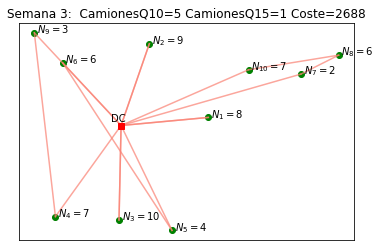

In [39]:
#Representación de la solución
plt.figure(figsize=(6,4))
plt.scatter(loc_x[1:],loc_y[1:],color="green")
plt.xticks([])
plt.yticks([])
plt.title("Semana 3:  CamionesQ10=5 CamionesQ15=1 Coste=%d" %(prob3.best_value))
for i in puntos_verdes:
    plt.annotate('$N_{%d}=%d$' % (i,week3[i]),(loc_x[i]+0.5,loc_y[i]))
for i,j in arcos_activos3:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],color="salmon",alpha=0.7)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.annotate('DC',(loc_x[0]-2,loc_y[0]+2))
plt.show

## 5. Solución cuarta semana

In [40]:
week4

{1: 7, 2: 4, 3: 3, 4: 3, 5: 5, 6: 3, 7: 4, 8: 1, 9: 5, 10: 5}

In [41]:
# Definición de la red

from networkx import DiGraph

G4 = DiGraph()

G4.add_edge("Source", 1, cost=[17,21])
G4.add_edge("Source", 2, cost=[40,48])   
G4.add_edge("Source", 3, cost=[46,55])
G4.add_edge("Source", 4, cost=[46,55])
G4.add_edge("Source", 5, cost=[52,62])
G4.add_edge("Source", 6, cost=[32,39])
G4.add_edge("Source", 7, cost=[42,51])
G4.add_edge("Source", 8, cost=[54,64])
G4.add_edge("Source", 9, cost=[48,57])
G4.add_edge("Source", 10, cost=[36,44]) 


G4.add_edge(1, "Sink", cost=[17,21])
G4.add_edge(2, "Sink", cost=[40,48])
G4.add_edge(3, "Sink", cost=[46,55])
G4.add_edge(4, "Sink", cost=[46,55])
G4.add_edge(5, "Sink", cost=[52,62])
G4.add_edge(6, "Sink", cost=[32,39])
G4.add_edge(7, "Sink", cost=[42,51])
G4.add_edge(8, "Sink", cost=[54,64])
G4.add_edge(9, "Sink", cost=[48,57])
G4.add_edge(10, "Sink", cost=[36,44])



G4.add_edge(1, 2, cost=[37,45])
G4.add_edge(1, 3, cost=[53,63])
G4.add_edge(1, 4, cost=[56,67])
G4.add_edge(1, 5, cost=[55,66])
G4.add_edge(1, 6, cost=[38,46])
G4.add_edge(1, 7, cost=[27,33])
G4.add_edge(1, 8, cost=[39,47])
G4.add_edge(1, 9, cost=[53,63])
G4.add_edge(1, 10, cost=[24,29])


G4.add_edge(2, 1, cost=[37,45])
G4.add_edge(2, 3, cost=[86,103])
G4.add_edge(2, 4, cost=[86,103])
G4.add_edge(2, 5, cost=[91,109])
G4.add_edge(2, 6, cost=[19,23])
G4.add_edge(2, 7, cost=[32,39])
G4.add_edge(2, 8, cost=[37,44])
G4.add_edge(2, 9, cost=[23,27])
G4.add_edge(2, 10, cost=[23,27])


G4.add_edge(3, 1, cost=[53,63])
G4.add_edge(3, 2, cost=[86,103])
G4.add_edge(3, 4, cost=[12,15])
G4.add_edge(3, 5, cost=[11,14])
G4.add_edge(3, 6, cost=[77,92])
G4.add_edge(3, 7, cost=[79,95])
G4.add_edge(3, 8, cost=[90,108])
G4.add_edge(3, 9, cost=[92,111])
G4.add_edge(3, 10, cost=[77,92])



G4.add_edge(4, 1, cost=[56,67])
G4.add_edge(4, 2, cost=[86,103])
G4.add_edge(4, 3, cost=[12,15])
G4.add_edge(4, 5, cost=[23,28])
G4.add_edge(4, 6, cost=[75,89])
G4.add_edge(4, 7, cost=[83,100])
G4.add_edge(4, 8, cost=[95,114])
G4.add_edge(4, 9, cost=[89,107])
G4.add_edge(4, 10, cost=[80,96])

G4.add_edge(5, 1, cost=[55,66])
G4.add_edge(5, 2, cost=[91,109])
G4.add_edge(5, 3, cost=[11,14])
G4.add_edge(5, 4, cost=[23,28])
G4.add_edge(5, 6, cost=[84,101])
G4.add_edge(5, 7, cost=[80,96])
G4.add_edge(5, 8, cost=[91,109]) 
G4.add_edge(5, 9, cost=[99,119])
G3.add_edge(5, 10, cost=[79,95])

G4.add_edge(6, 1, cost=[38,46])
G4.add_edge(6, 2, cost=[19,23])
G4.add_edge(6, 3, cost=[77,92])
G4.add_edge(6, 4, cost=[75,89])
G4.add_edge(6, 5, cost=[84,101])
G4.add_edge(6, 7, cost=[46,55])
G4.add_edge(6, 8, cost=[53,63])
G4.add_edge(6, 9, cost=[16,19])
G4.add_edge(6, 10, cost=[36,43])

G4.add_edge(7, 1, cost=[27,33])
G4.add_edge(7, 2, cost=[32,39])
G4.add_edge(7, 3, cost=[79,95])
G4.add_edge(7, 4, cost=[83,100])
G4.add_edge(7, 5, cost=[80,96])
G4.add_edge(7, 6, cost=[46,55])
G4.add_edge(7, 8, cost=[12,14])
G4.add_edge(7, 9, cost=[55,66])
G4.add_edge(7, 10, cost=[10,12])


G4.add_edge(8, 1, cost=[39,47])
G4.add_edge(8, 2, cost=[37,44])
G4.add_edge(8, 3, cost=[90,108])
G4.add_edge(8, 4, cost=[95,114])
G4.add_edge(8, 5, cost=[91,109])
G4.add_edge(8, 6, cost=[53,63])
G4.add_edge(8, 7, cost=[12,14])
G4.add_edge(8, 9, cost=[59,71])
G4.add_edge(8, 10, cost=[19,22])

G4.add_edge(9, 1, cost=[53,63])
G4.add_edge(9, 2, cost=[23,27])
G4.add_edge(9, 3, cost=[92,111])
G4.add_edge(9, 4, cost=[89,107])
G4.add_edge(9, 5, cost=[99,119])
G4.add_edge(9, 6, cost=[16,19])
G4.add_edge(9, 7, cost=[55,66])
G4.add_edge(9, 8, cost=[59,71])
G4.add_edge(9, 10, cost=[45,54])

G4.add_edge(10, 1, cost=[24,29])
G4.add_edge(10, 2, cost=[23,27])
G4.add_edge(10, 3, cost=[77,92])
G4.add_edge(10, 4, cost=[80,96])
G4.add_edge(10, 5, cost=[79,95])
G4.add_edge(10, 6, cost=[36,43])
G4.add_edge(10, 7, cost=[10,12])
G4.add_edge(10, 8, cost=[19,22]) 
G4.add_edge(10, 9, cost=[45,54])


G4.nodes[1]["demand"] = 7
G4.nodes[2]["demand"] = 4
G4.nodes[3]["demand"] = 3
G4.nodes[4]["demand"] = 3
G4.nodes[5]["demand"] = 5
G4.nodes[6]["demand"] = 3
G4.nodes[7]["demand"] = 4
G4.nodes[8]["demand"] = 1
G4.nodes[9]["demand"] = 5
G4.nodes[10]["demand"] = 5

In [42]:
from vrpy import VehicleRoutingProblem
prob4 = VehicleRoutingProblem(G4, mixed_fleet=True,fixed_cost=[300,500],load_capacity=[10,15])
%time prob4.solve()

INFO:vrpy.vrp:new upper bound : max num stops = 7
INFO:vrpy.vrp:iteration 0, 3826.0
INFO:vrpy.vrp:iteration 1, 2803.0
INFO:vrpy.vrp:iteration 2, 2456.0
INFO:vrpy.vrp:iteration 3, 2415.0
INFO:vrpy.vrp:iteration 4, 2290.5
INFO:vrpy.vrp:iteration 5, 2290.5
INFO:vrpy.vrp:iteration 6, 2183.0
INFO:vrpy.vrp:iteration 7, 2085.1
INFO:vrpy.vrp:iteration 8, 2025.9
INFO:vrpy.vrp:iteration 9, 1922.6
INFO:vrpy.vrp:iteration 10, 1904.0
INFO:vrpy.vrp:iteration 11, 1884.6
INFO:vrpy.vrp:iteration 12, 1843.6
INFO:vrpy.vrp:iteration 13, 1803.8
INFO:vrpy.vrp:iteration 14, 1792.2
INFO:vrpy.vrp:iteration 15, 1781.7
INFO:vrpy.vrp:iteration 16, 1777.7
INFO:vrpy.vrp:iteration 17, 1775.3
INFO:vrpy.vrp:iteration 18, 1773.0
INFO:vrpy.vrp:iteration 19, 1773.0
INFO:vrpy.master_solve_pulp:total cost = 1779.0


Wall time: 13.3 s


In [43]:
#Rutas optimas
prob4.best_routes

{1: ['Source', 7, 8, 10, 'Sink'],
 2: ['Source', 6, 1, 'Sink'],
 3: ['Source', 4, 3, 2, 'Sink'],
 4: ['Source', 9, 5, 'Sink']}

In [44]:
#Coste de cada ruta
prob4.best_routes_cost

{1: 409, 2: 387, 3: 484, 4: 499}

In [45]:
# Material recogido en cada ruta
prob4.best_routes_load

{1: 10, 2: 10, 3: 10, 4: 10}

In [46]:
arcos_activos4=[(0,7),(7,8),(8,10),(10,0),(0,6),(6,1),(1,0),(0,4),(4,3),(3,2),(2,0),(0,9),(9,5),(5,0)]

<function matplotlib.pyplot.show(close=None, block=None)>

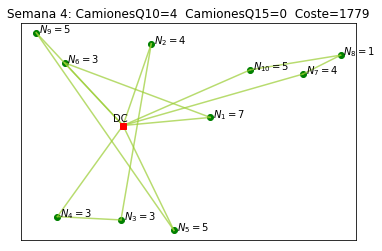

In [47]:
#Representación de la solución
plt.figure(figsize=(6,4))
plt.scatter(loc_x[1:],loc_y[1:],color="green")
plt.xticks([])
plt.yticks([])
plt.title("Semana 4: CamionesQ10=4  CamionesQ15=0  Coste=%d" %(prob4.best_value))
for i in puntos_verdes:
    plt.annotate('$N_{%d}=%d$' % (i,week4[i]),(loc_x[i]+0.5,loc_y[i]))
for i,j in arcos_activos4:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],color="yellowgreen",alpha=0.7)
plt.plot(loc_x[0], loc_y[0], c='r', marker='s')
plt.annotate('DC',(loc_x[0]-2,loc_y[0]+2))
plt.show